In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

%matplotlib inline
import matplotlib as mpl 

In [3]:
df = pd.read_csv("/Users/remek/OneDrive/Documents/New Machine Learning/Projects/spotify_preprocessed.csv",index_col=None)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.738790,0.626533,0.090909,0.899432,0.0,0.070809,0.020080,0.00000,0.068476,0.723361,0.400098,0.093080,0.8,0.193225,0.093023,1.0
1,0.418807,0.247058,0.454545,0.687954,0.0,0.012962,0.874498,0.81809,0.080700,0.256148,0.676658,0.086266,0.6,0.155665,0.081395,0.0
2,0.530910,0.415269,0.818182,0.862211,0.0,0.031601,0.161647,0.00000,0.094582,0.280738,0.773251,0.103036,0.8,0.210605,0.081395,1.0
3,0.478668,0.648560,0.000000,0.880682,0.0,0.032351,0.005151,0.00000,0.194033,0.298156,0.305743,0.095749,0.8,0.138515,0.058140,0.0
4,0.810623,0.887860,0.090909,0.919516,1.0,0.270487,0.003825,0.00000,0.387755,0.799180,0.705958,0.067117,0.8,0.117248,0.069767,1.0


In [4]:
df.shape

(6398, 16)

In [6]:
#shuffling the data
df=df.sample(frac=1)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
5776,0.492817,0.479349,0.272727,0.842837,1.0,0.003856,0.546185,0.006010,0.180566,0.290984,0.289002,0.105273,0.8,0.123856,0.093023,1.0
3024,0.524380,0.787734,0.818182,0.910850,0.0,0.022389,0.004177,0.000001,0.238579,0.330943,0.463848,0.155399,0.8,0.123629,0.116279,0.0
1371,0.139094,0.971965,0.818182,0.883198,1.0,0.215854,0.000153,0.849246,0.039470,0.117828,0.333050,0.116604,0.8,0.110751,0.058140,0.0
1102,0.325207,0.608510,0.818182,0.857911,0.0,0.080878,0.050201,0.000080,0.172278,0.080840,0.888321,0.099800,0.8,0.126175,0.093023,1.0
5189,0.744232,0.825782,0.090909,0.902873,1.0,0.156936,0.014257,0.010754,0.108049,0.598361,0.661653,0.102266,0.8,0.076450,0.127907,1.0


In [5]:
#Dropping target column because it is the column we are focused on
X=df.drop(['target'],axis=1)

In [6]:
#Creating a new dataframe with the target column
Y=df["target"]

In [7]:
Y=Y.values

In [8]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [9]:
#Shuffle the data then split it into training (90% of the data) and test set (10% of the data).
x_train, x_test, y_train, y_test = train_test_split(scaled_X, Y, 
                                test_size=0.1, random_state=1)

In [10]:
#Split the training set further into training and validation sets with 80% and 20% percentages respectively.
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, 
                                test_size=(0.2), random_state=1)

In [11]:
x_train.shape,x_test.shape,x_val.shape

((4606, 15), (640, 15), (1152, 15))

In [14]:
#number of neurons in hidden layes and number of distinct outputs
nn = 21 
num_outputs = 2              

In [15]:
#Three hidden layers and one output layer
model_10 = keras.Sequential([
#Flattening improves the results
keras.layers.Flatten(),  
keras.layers.Dense(nn, activation=tf.nn.relu),
keras.layers.Dense(nn, activation=tf.nn.relu),
keras.layers.Dense(nn, activation=tf.nn.relu),
keras.layers.Dense(num_outputs, activation=tf.nn.softmax)
    
    ])

In [16]:
#opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model_10.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])

In [17]:
#fitting the model 
model_fit = model_10.fit(x_train, y_train, epochs=20,
                         validation_data=(x_val, y_val), batch_size=100, verbose = 1)

Epoch 1/20
47/47 [==============================] - 1s 9ms/step - loss: 0.6417 - accuracy: 0.6557 - val_loss: 0.5879 - val_accuracy: 0.7240
Epoch 2/20
47/47 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.7256 - val_loss: 0.5076 - val_accuracy: 0.7535
Epoch 3/20
47/47 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.7620 - val_loss: 0.4694 - val_accuracy: 0.7760
Epoch 4/20
47/47 [==============================] - 0s 2ms/step - loss: 0.4565 - accuracy: 0.7877 - val_loss: 0.4422 - val_accuracy: 0.7891
Epoch 5/20
47/47 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.7994 - val_loss: 0.4253 - val_accuracy: 0.8021
Epoch 6/20
47/47 [==============================] - 0s 4ms/step - loss: 0.4200 - accuracy: 0.8061 - val_loss: 0.4128 - val_accuracy: 0.7995
Epoch 7/20
47/47 [==============================] - 0s 5ms/step - loss: 0.4098 - accuracy: 0.8113 - val_loss: 0.4057 - val_accuracy: 0.8099
Epoch 8/20
47/47 [==

In [18]:
#Storing the predictions
predictions = model_10.predict(x_test)

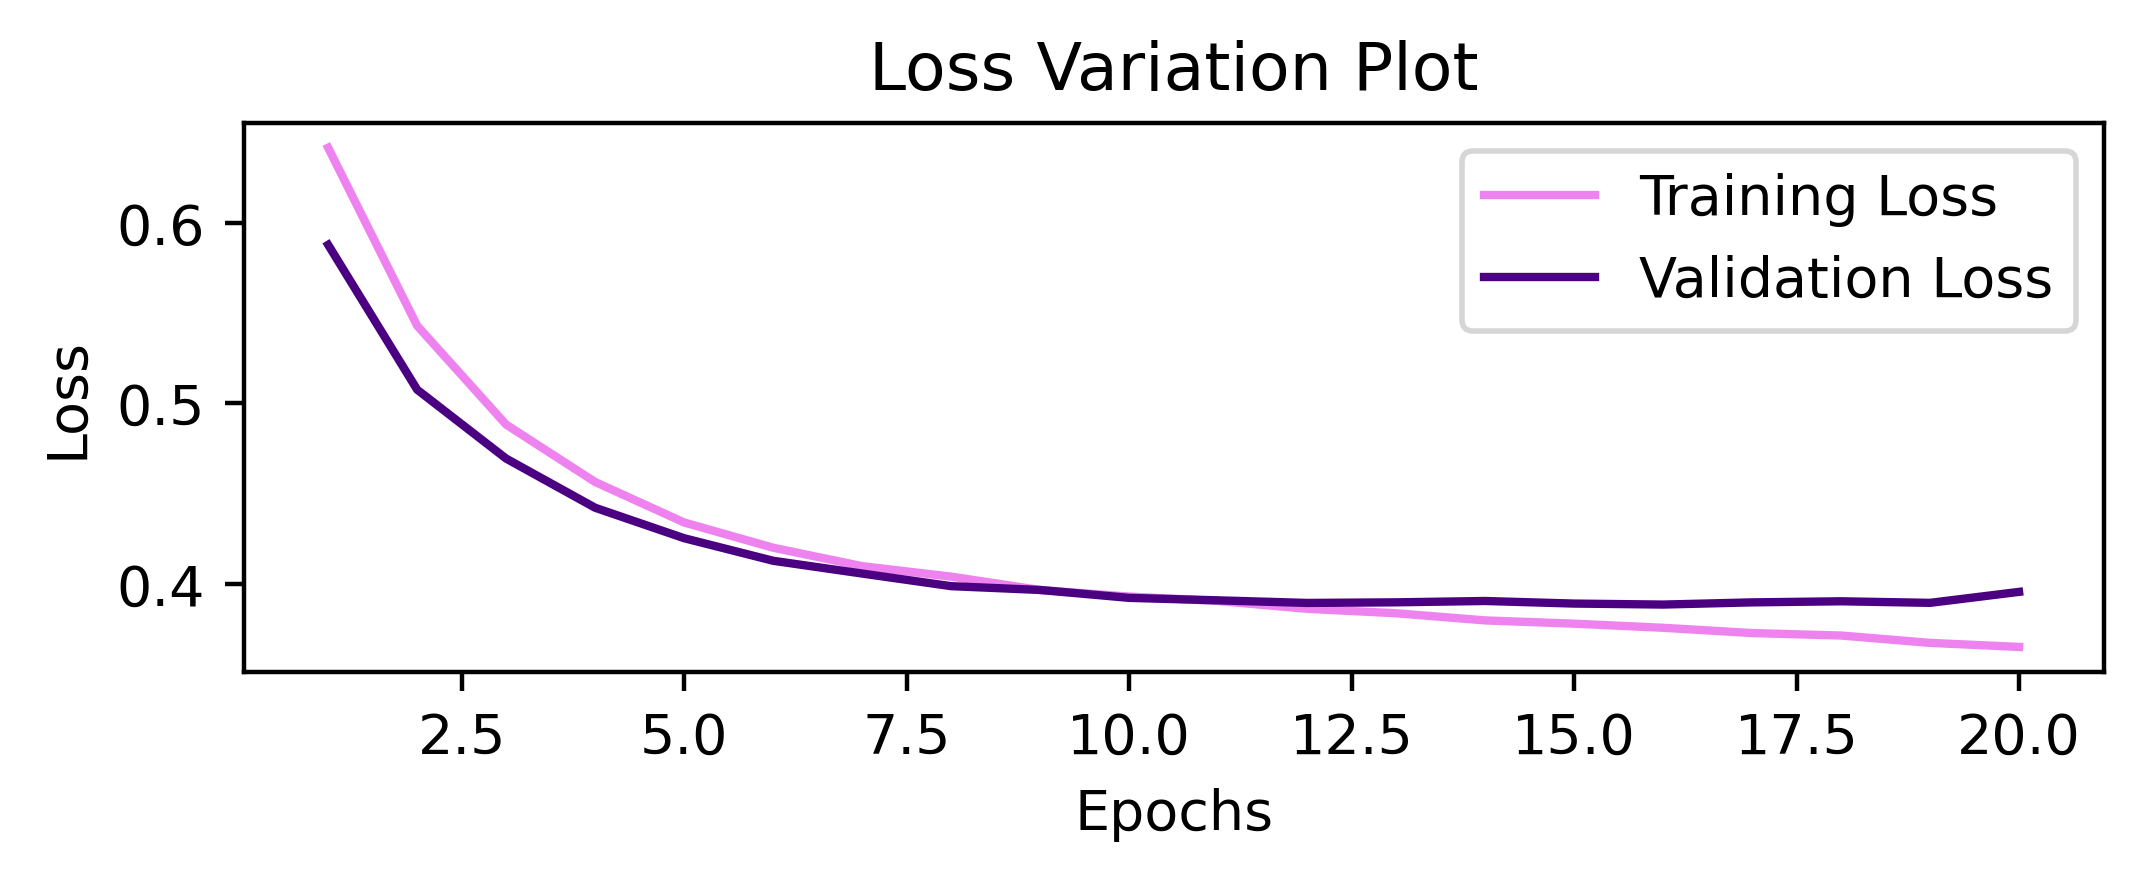

In [23]:
training_loss = model_fit.history['loss']
validation_loss = model_fit.history['val_loss']
epoch_count1 = range(1, len(training_loss) + 1)


plt.subplot(2,1,2)
plt.title('Loss Variation Plot')
plt.plot(epoch_count1, training_loss, color='violet', label='Training Loss')
plt.plot(epoch_count1, validation_loss, color='indigo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

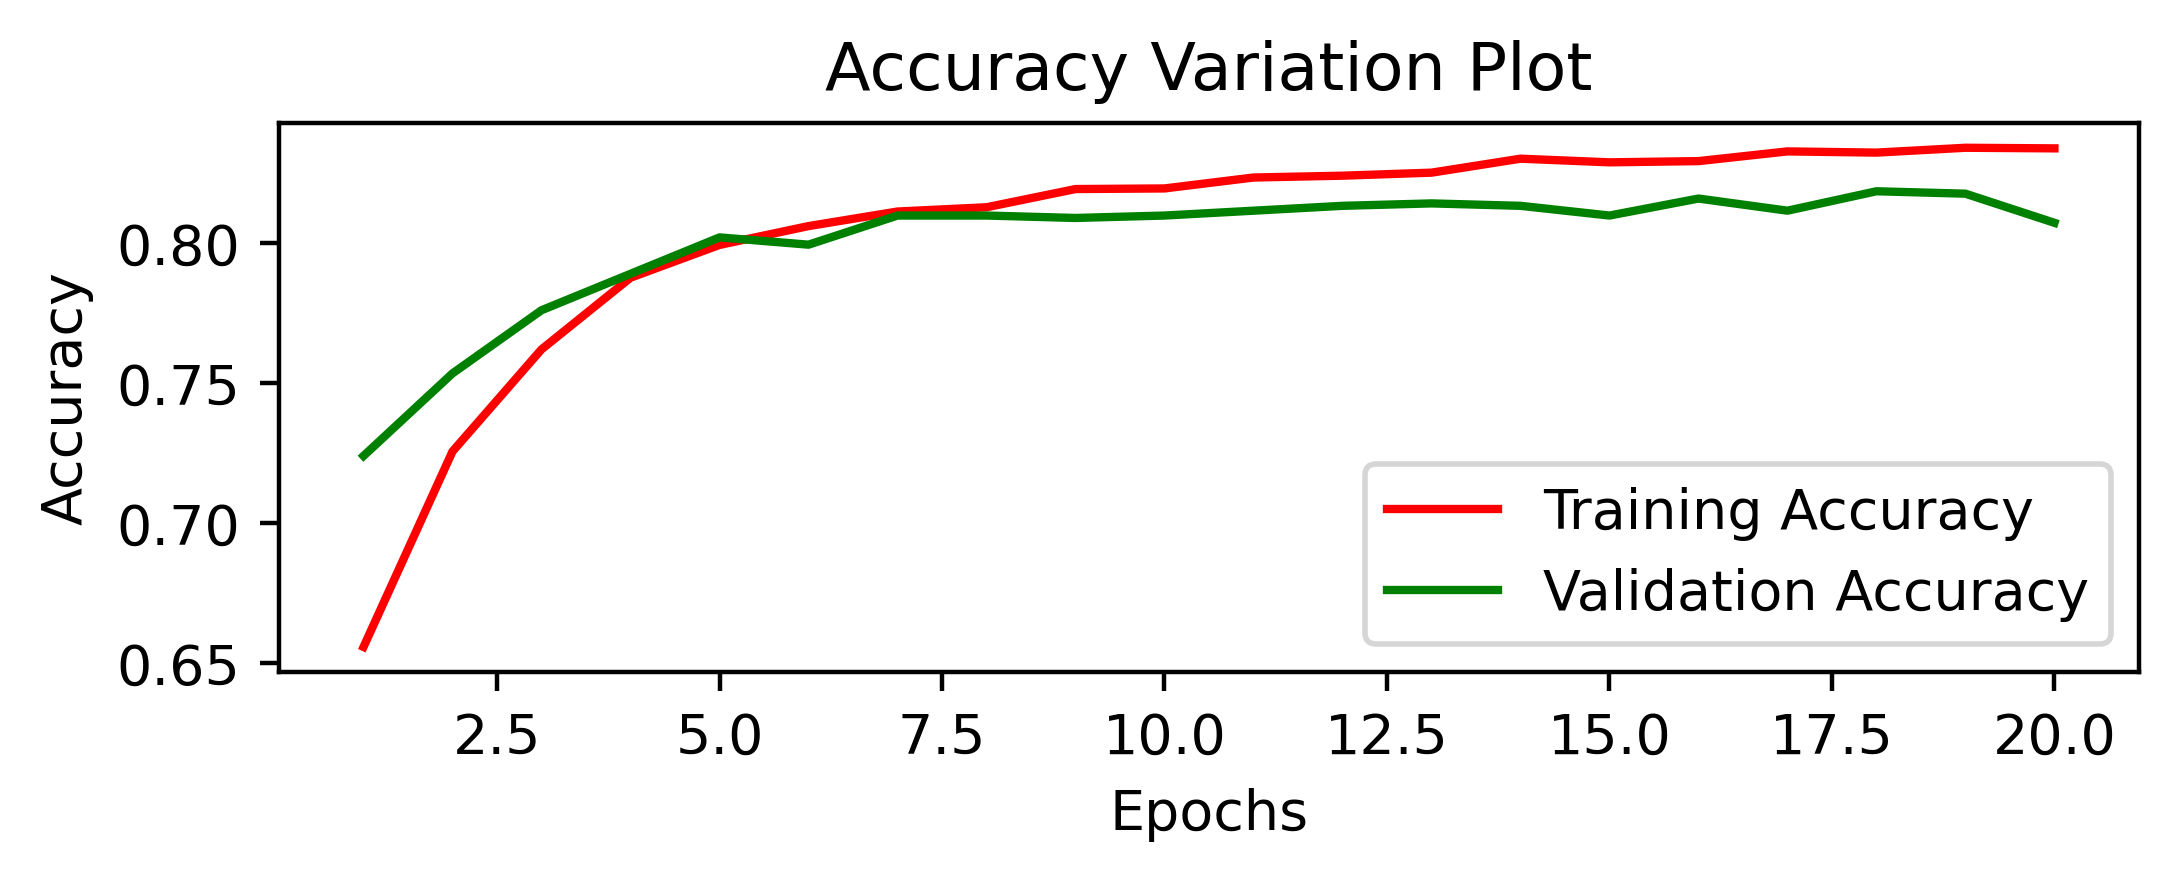

In [20]:
training_acc = model_fit.history['accuracy']
validation_acc = model_fit.history['val_accuracy']
epoch_count2 = range(1, len(training_acc) + 1)

#plotting 
plt.subplot(2,1,2)
plt.title('Accuracy Variation Plot')
plt.plot(epoch_count2, training_acc, color='red', label='Training Accuracy')
plt.plot(epoch_count2, validation_acc, color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [24]:
print(predictions[150])
print('Predicted:', np.argmax(predictions[150]))
print('Original:', y_test[150])

[0.27530122 0.7246988 ]
Predicted: 1
Original: 1.0


In [21]:
model_10.save('Trained_model_10')    #saved as protobuf (.pb)

INFO:tensorflow:Assets written to: Trained_model_10\assets


In [22]:
model_10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 15)                0         
                                                                 
 dense (Dense)               (None, 200)               3200      
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 2)                 402       
                                                                 
Total params: 84,002
Trainable params: 84,002
Non-trainable params: 0
_________________________________________________________________


In [23]:
model = tf.keras.models.load_model('Trained_model_10')
print(x_test[1])

[ 1.0719547  -0.27318549  1.30797546  0.23036953  0.74104827  0.10267454
 -0.07724903 -0.51723877 -0.33526633 -0.00705676 -1.59014179 -0.29784098
  0.18303334 -1.11510537 -0.34867698]


In [24]:
print(x_test[1].reshape( 1,-1))

[[ 1.0719547  -0.27318549  1.30797546  0.23036953  0.74104827  0.10267454
  -0.07724903 -0.51723877 -0.33526633 -0.00705676 -1.59014179 -0.29784098
   0.18303334 -1.11510537 -0.34867698]]


In [25]:
v = model.predict(x_test[1].reshape( 1,-1))
print(v)

[[0.01760102 0.98239905]]
